[![Open In colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/3_Agrupacion_y_Agregacion/agrupacion_agregacion.ipynb)

# Data Wrangling Avanzado


## Tabla de Contenidos

    I. Pandas y Cadenas de Texto (Strings)
        I. Introducción
        II. Metodos para manipular strings
        III. RegExp 
        IV. Melt
        V. Pivot table
    II. OLAP vs OLTP
    III. Series de Tiempo (Time Series)
        I. datetime y funciones para manejo de series de tiempo
        II. Rolling Windows y Moving Average
        III. Simple Exponential Smoothing
        IV. Shift y Diff
        V. Ejercicios

## Introducción

En esta clase vamos a ver cómo hacer manejo avanzado de datos a partir, tanto en cadenas de texto como en series de tiempo. El primer dataset que vamos a utilizar es del portal de datos abiertos de España. La única modificación que haremos sera quedarnos con la columna de Texto y solo los valores unicos.

In [36]:
!pip install seaborn
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 216 kB 1.5 MB/s eta 0:00:01


In [37]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/parodesprov.csv')

In [15]:
texto = df['Texto'].unique()

In [16]:
texto

array(['Alegría-Dulantzi', 'Amurrio', 'Aramaio', ..., 'Ceuta', 'Melilla',
       'Cerdedo-Cotobade'], dtype=object)

 En este punto solo tendremos un array de objetos que representan texto, pero podria ser cualquier tipo de objetos
 Vamos a transformarlos en una Serie de pandas


In [42]:
texto_ss = pd.Series(texto)

Vamos a comprobar el tipo de dato que conforma nuestra Serie. Si dice 'str' se refiere a Strings. 

In [45]:

type(texto_ss[0])

str

## Pandas y Cadenas de Texto

Pandas nos proveera una libreria completa de manejo de texto

 Contar cadenas iguales

In [ ]:
texto_ss.str.count("Aramaio")

Buscar cadenas iguales

In [ ]:
texto_ss.str.match("Amurrio")

Convertir a Mayusculas y Minusculas

In [ ]:
texto_ss.str.lower()
texto_ss.str.upper()

Ahora vamos a buscar los textos que contengan otro string adentro

In [80]:
texto_ss.str.contains('Am')
texto_ss.str.contains('AM', case=False)

0       False
1        True
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8080    False
8081    False
8082    False
8083    False
8084    False
8085    False
8086    False
8087    False
8088    False
8089    False
8090    False
8091    False
8092    False
8093    False
8094    False
8095    False
8096    False
8097    False
8098    False
8099     True
8100    False
8101    False
8102    False
8103    False
8104    False
8105    False
8106     True
8107    False
8108    False
8109    False
Length: 8110, dtype: object

Contar letras



In [53]:
texto_ss.str.len()

0       16.0
1        7.0
2        7.0
3       10.0
4        7.0
5       19.0
6        9.0
7       11.0
8       21.0
9        9.0
10      12.0
11       7.0
12      15.0
13       8.0
14       6.0
15       9.0
16      15.0
17       7.0
18      14.0
19      13.0
20      17.0
21       6.0
22       9.0
23      18.0
24      19.0
25       4.0
26      13.0
27      13.0
28      28.0
29       9.0
        ... 
8080     9.0
8081     9.0
8082     9.0
8083    15.0
8084    17.0
8085    15.0
8086     7.0
8087    11.0
8088     8.0
8089    12.0
8090    19.0
8091    19.0
8092    11.0
8093    21.0
8094    20.0
8095    20.0
8096    22.0
8097    20.0
8098    23.0
8099    20.0
8100    10.0
8101     9.0
8102     8.0
8103     5.0
8104     4.0
8105     8.0
8106    21.0
8107     5.0
8108     7.0
8109    16.0
Length: 8110, dtype: float64

Split nos va a ser muy util para separar cadenas de texto por algun caracter particular. Separamos por el caracter ' ' (espacio). Notar como se transforman los nombres compuestos
MUCHO CUIDADO! Nuestros strings ahora son arrays de strings!! :o

In [70]:
texto_ss.str.split(' ') 

0                      [Alegría-Dulantzi]
1                               [Amurrio]
2                               [Aramaio]
3                            [Artziniega]
4                               [Armiñón]
5                   [Arratzua-Ubarrundia]
6                             [Asparrena]
7                           [Ayala/Aiara]
8               [Baños, de, Ebro/Mañueta]
9                             [Barrundia]
10                         [Berantevilla]
11                              [Bernedo]
12                      [Campezo/Kanpezu]
13                             [Zigoitia]
14                               [Kripan]
15                            [Kuartango]
16                      [Elburgo/Burgelu]
17                              [Elciego]
18                       [Elvillar/Bilar]
19                        [Iruraiz-Gauna]
20                    [Labastida/Bastida]
21                               [Lagrán]
22                            [Laguardia]
23                   [Lanciego/Lan

Como hariamos para quedarnos con la primera palabra de cada string separado por ' '(espacio).


In [72]:
texto_ss.str.split(' ').str[0]

0          Alegría-Dulantzi
1                   Amurrio
2                   Aramaio
3                Artziniega
4                   Armiñón
5       Arratzua-Ubarrundia
6                 Asparrena
7               Ayala/Aiara
8                     Baños
9                 Barrundia
10             Berantevilla
11                  Bernedo
12          Campezo/Kanpezu
13                 Zigoitia
14                   Kripan
15                Kuartango
16          Elburgo/Burgelu
17                  Elciego
18           Elvillar/Bilar
19            Iruraiz-Gauna
20        Labastida/Bastida
21                   Lagrán
22                Laguardia
23       Lanciego/Lantziego
24                 Lapuebla
25                     Leza
26            Laudio/Llodio
27            Arraia-Maeztu
28                   Moreda
29                Navaridas
               ...         
8080              Valmadrid
8081              Valpalmas
8082              Valtorres
8083                Velilla
8084                

Ahora queremos que cada palabra de las que separamos, quede en una columna distinta. Usaremos la opcion expand

In [73]:
texto_ss.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7
0,Alegría-Dulantzi,None,None,None,None,None,None,None
1,Amurrio,None,None,None,None,None,None,None
2,Aramaio,None,None,None,None,None,None,None
3,Artziniega,None,None,None,None,None,None,None
4,Armiñón,None,None,None,None,None,None,None
5,Arratzua-Ubarrundia,None,None,None,None,None,None,None
6,Asparrena,None,None,None,None,None,None,None
7,Ayala/Aiara,None,None,None,None,None,None,None
8,Baños,de,Ebro/Mañueta,None,None,None,None,None
9,Barrundia,None,None,None,None,None,None,None


 Reemplacemos los espacios con algun caracter nuevo.

In [74]:
texto_ss.str.replace(' ', '$')

0                   Alegría-Dulantzi
1                            Amurrio
2                            Aramaio
3                         Artziniega
4                            Armiñón
5                Arratzua-Ubarrundia
6                          Asparrena
7                        Ayala/Aiara
8              Baños$de$Ebro/Mañueta
9                          Barrundia
10                      Berantevilla
11                           Bernedo
12                   Campezo/Kanpezu
13                          Zigoitia
14                            Kripan
15                         Kuartango
16                   Elburgo/Burgelu
17                           Elciego
18                    Elvillar/Bilar
19                     Iruraiz-Gauna
20                 Labastida/Bastida
21                            Lagrán
22                         Laguardia
23                Lanciego/Lantziego
24               Lapuebla$de$Labarca
25                              Leza
26                     Laudio/Llodio
2

Ahora queremos juntar todas las palabras en una sola separadas por el caracter '#'. Usemos el metodo cat

In [75]:
texto_ss.str.cat(sep='#')

"Alegría-Dulantzi#Amurrio#Aramaio#Artziniega#Armiñón#Arratzua-Ubarrundia#Asparrena#Ayala/Aiara#Baños de Ebro/Mañueta#Barrundia#Berantevilla#Bernedo#Campezo/Kanpezu#Zigoitia#Kripan#Kuartango#Elburgo/Burgelu#Elciego#Elvillar/Bilar#Iruraiz-Gauna#Labastida/Bastida#Lagrán#Laguardia#Lanciego/Lantziego#Lapuebla de Labarca#Leza#Laudio/Llodio#Arraia-Maeztu#Moreda de Álava/Moreda Araba#Navaridas#Okondo#Oyón-Oion#Peñacerrada-Urizaharra#Erriberagoitia/Ribera Alta#Ribera Baja/Erribera Beitia#Añana#Salvatierra/Agurain#Samaniego#San Millán/Donemiliaga#Urkabustaiz#Valdegovía/Gaubea#Harana/Valle de Arana#Villabuena de Álava/Eskuernaga#Legutio#Vitoria-Gasteiz#Yécora/Iekora#Zalduondo#Zambrana#Zuia#Iruña Oka/Iruña de Oca#Lantarón#Abengibre#Alatoz#Albacete#Albatana#Alborea#Alcadozo#Alcalá del Júcar#Alcaraz#Almansa#Alpera#Ayna#Balazote#Balsa de Ves#Ballestero, El#Barrax#Bienservida#Bogarra#Bonete#Bonillo, El#Carcelén#Casas de Juan Núñez#Casas de Lázaro#Casas de Ves#Casas-Ibáñez#Caudete#Cenizate#Corral-Rubio

## Expresiones Regulares (RegExp)

Las expresiones regulares mejor conocidas como RegExp son cadenas de caracteres que representan un patron y se pueden aplicar junto con todos los metodos vistos previamente a fin de encontrar los strings que hagan match a ese patron.

Para practicar esta forma de buscar patrones vamos a utilizar el metodo findall

Para empezar vamos a buscar todas las palabras que contienen doble l en su texto

In [89]:
texto_ss.str.findall('ll')

0             []
1             []
2             []
3             []
4             []
5             []
6             []
7             []
8             []
9             []
10          [ll]
11            []
12            []
13            []
14            []
15            []
16            []
17            []
18          [ll]
19            []
20            []
21            []
22            []
23            []
24            []
25            []
26            []
27            []
28            []
29            []
          ...   
8080          []
8081          []
8082          []
8083        [ll]
8084        [ll]
8085          []
8086          []
8087          []
8088        [ll]
8089        [ll]
8090        [ll]
8091        [ll]
8092        [ll]
8093    [ll, ll]
8094        [ll]
8095        [ll]
8096        [ll]
8097        [ll]
8098        [ll]
8099        [ll]
8100        [ll]
8101          []
8102          []
8103          []
8104          []
8105          []
8106    [ll, ll]
8107          

## Melt

El proceso de Melt(derretir) se refiere a transformar/masajear un dataset de una manera muy particular en el cual alguna columna funciona como identificador mientras las otras columnas consideradas variables no son modificadas. Veamos los ejemplos a continuacion para entenderlo mejor

In [10]:
df_example = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},

                   'B': {0: 1, 1: 3, 2: 5},

                   'C': {0: 2, 1: 4, 2: None}})

Veamos primero como luce el dataset

In [11]:
df_example

,A,B,C
0,a,1,2.0
1,b,3,4.0
2,c,5,NaN


Ahora veamos que hace la operacion de Melt sobre la columna B y C tomando la columna A como identificador

In [12]:
pd.melt(df_example, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1.0
1,b,B,3.0
2,c,B,5.0
3,a,C,2.0
4,b,C,4.0
5,c,C,NaN


Este metodo es particularmente util para re balancear datasets para procesos de Machine Learning

## Pivot Tables

Las pivot tables son especialmente utiles para transformar datasets de manera que podemos aplicar funciones de agregacion sobre columnas. Veamos el ejemplo a continuacion. Para este caso vamos a utilizar el dataset cargado en la primera parte de este mismo curso.

In [15]:
df.head(10)

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0
5,6,1008,Arratzua-Ubarrundia,1,16,30.0,979.0,Araba/Álava,16.0,1.074230e+08,89972.934611,1.0
6,7,1009,Asparrena,1,16,86.0,1630.0,Araba/Álava,16.0,1.180081e+08,70669.968212,1.0
7,8,1010,Ayala/Aiara,1,16,111.0,2946.0,Araba/Álava,16.0,2.643403e+08,88663.191555,1.0
8,9,1011,Baños de Ebro/Mañueta,1,16,6.0,308.0,Araba/Álava,16.0,1.720680e+07,24650.591316,1.0
9,10,1013,Barrundia,1,16,24.0,903.0,Araba/Álava,16.0,1.828652e+08,80734.486192,1.0


Es muy importante entender antes de hacer una pivot table, cual es la pregunta de negocio que queremos responder. En este caso particular nos interesa sabe el promedio de paro registrado por Texto.

In [18]:
pd.pivot_table(df, index=["Texto"],values=["TotalParoRegistrado"], aggfunc=np.mean)


,TotalParoRegistrado
Texto,
Ababuj,2.5
Abades,44.5
Abadiño,350.5
Abadía,46.5
Abadín,100.0
Abajas,1.0
Abaltzisketa,6.0
Abanilla,486.0
Abanto,2.0


Es importante entender que ahora nuestra columna Texto se volvio el indice. Mucho cuidado con esto para no cometer errores mas tarde

Veamos ahora que pasa si queremos agregar otra columna tanto al indice como a los valores

In [22]:
pd.pivot_table(df, index=["Cod_Prov","Cod_CCAA"],values=["TotalParoRegistrado","PAD_1C02"], aggfunc=np.mean)

,,PAD_1C02,TotalParoRegistrado
Cod_Prov,Cod_CCAA,,
1,16,6379.411765,445.803922
2,8,4495.114943,462.534483
3,10,12985.074468,1211.085106
4,1,6849.364078,609.305825
5,7,651.641129,56.810484
6,11,4133.324242,486.336364
7,4,16591.186567,984.238806
8,9,17875.750804,1060.551447
9,7,969.226415,63.642857


En este caso, el dataset resultante va a tener un tipo indice del tipo MultiIndex. 

# OLAP vs OLTP

OLTP se refiere a los sistemas de base de datos tradicionales que conocemos, los cuales basan toda su operatoria en transacciones atomicas ( se hacen por completo o no se hacen ). Estos se conocen como sistemas transaccionales e implementan diferentes algoritmos a fin de asegurar que una no se generen errores ni competencias entre usuarios que estan intentando acceder a los mismos registros a la vez. 

OLAP por otra parte se refiere a todos los sistemas de base de datos utilizados para analisis y reportes de negocios, en los cuales se realizan diferentes operaciones de agregacion sobre los datos, a fin de proveer a los usuarios con informacion relevante. Estos sistemas no son online, generalmente se realizan procesos de carga y transformaciones masivas luego de varios dias, semana o meses. La informacion se segrega por dimensiones (dias, semanas, meses).

Tidy Data (Datos Ordenados) se refiere al proceso de ordenado de la data a fin de que sea utilizable en algun proceso de Machine Learning. 

# Series de Tiempo

Las series de tiempo representan uno de los problemas mas interesantes en la ciencia de datos ya que refiere a eventos continuos y ordenados los cuales pueden ser independientes o tener alguna correlacion entre si. En este modulo veremos los metodos mas utilizados para manipular series de tiempo en pandas

## Datetime y metodos de manipulacion de series de tiempo

Para esta seccion vamos a utilizar el dataset de consumo energetico de Alemania.

In [18]:
df_time_series = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

Primeramente vamos a evaluar el dataset

In [19]:
df_time_series.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Las columnas son las siguientes:
    - Date — La fecha (yyyy-mm-dd)
    - Consumption — Electricidad Consumida en GWh
    - Wind — Produccion de energia eolica en GWh
    - Solar — Produccion de energia solar en GWh
    - Wind+Solar — Suma de las dos anteriores GWh

Antes de comenzar a explorar el dataset, veamos algunas funciones de pandas para crear fechas. El metodo to_datetime nos permite transformar un string en cierto formato a un objeto del tipo Timestamp, el cual consiste de una fecha y una hora. Podemos ver que acepta varios formatos

In [6]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [7]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

Lo primero que vamos a hacer es poner la fecha como indice de nuestro dataset. Esto va a crear un nuevo tipo de objeto llamado DatetimeIndex

In [22]:
df_time_series.Date = pd.DatetimeIndex(df_time_series.Date)

In [23]:
df_time_series = df_time_series.set_index('Date')


In [24]:
df_time_series.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


In [25]:
df_time_series.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Primeramente vamos a agregar columnas que nos proporcionen mas informacion sobre las fechas

In [26]:

df_time_series['Year'] = df_time_series.index.year
df_time_series['Month'] = df_time_series.index.month
df_time_series['Weekday'] = df_time_series.index.weekday_name
df_time_series.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Como creamos el indice por las fechas, podemos localizar cualquier dia que querramos ahora

In [27]:
df_time_series.loc['2017-08-10']

Consumption     1351.49
Wind            100.274
Solar             71.16
Wind+Solar      171.434
Year               2017
Month                 8
Weekday        Thursday
Name: 2017-08-10 00:00:00, dtype: object

Incluso podemos buscar rangos de fechas

In [28]:
df_time_series.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


O buscar por algun mes en particular

In [31]:
df_time_series.loc['2016-05']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2016-05-01,1078.602,179.870,147.931,327.801,2016,5,Sunday
2016-05-02,1405.185,81.868,197.183,279.051,2016,5,Monday
2016-05-03,1462.935,208.678,139.151,347.829,2016,5,Tuesday
2016-05-04,1430.136,84.961,174.185,259.146,2016,5,Wednesday
2016-05-05,1111.379,150.624,212.713,363.337,2016,5,Thursday
2016-05-06,1254.051,255.574,217.569,473.143,2016,5,Friday
2016-05-07,1149.938,315.362,215.963,531.325,2016,5,Saturday
2016-05-08,1072.653,390.557,217.819,608.376,2016,5,Sunday
2016-05-09,1403.845,360.421,207.427,567.848,2016,5,Monday


Ahora veamos como se ve nuestra data de consumo de energia

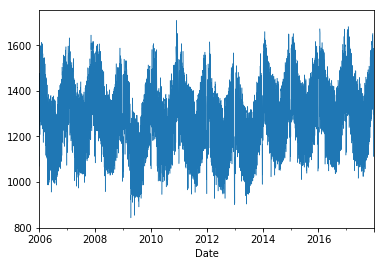

In [39]:
#! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
df_time_series['Consumption'].plot(linewidth=0.5);

## Ventanas y Medias moviles

Las ventanas moviles se refiere a aplicar alguna operacion de agregacion, por ejemplo el promedio sobre un conjunto de datos ordenados a la vez, por ejemplo el promedio de los ultimos 6 dias sobre cada conjunto ordenado de 6 dias en el dataset. Veamos un ejemplo para entenderlo mejor

In [45]:
opsd_7d = df_time_series["Consumption"].rolling(6).mean()
opsd_7d.head(10)

Date
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
2006-01-06    1371.668833
2006-01-07    1410.186000
2006-01-08    1381.430000
2006-01-09    1395.895000
2006-01-10    1415.844000
Name: Consumption, dtype: float64

Podemos observar como las primeras 5 mediciones son Nan, ya que utiliza los primeros 5 valores para calcular a partir del 6to dia la media. El valor en el 7mo dia va a ser calculado con los datos del 2do al 6to dia, y asi sucesivamente.

Este tipo de metodos son particularmente utiles en

## Suavizado Exponencial Simple (SES)

## Shift y Diff